In [1]:
documents = []

ego_id = '40379006'

file = open('Textos para testes/egos/' + ego_id + '.txt', 'r', encoding='utf-8')
for line in file:
    documents.append(line)
file.close()

file = open('Textos para testes/alters/' + ego_id + '.txt', 'r', encoding='utf-8')
for line in file:
    documents.append(line)
file.close()

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000 # max number of uniq words

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [3]:
from sklearn.decomposition import NMF

no_topics = 10
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.7, init='nndsvd').fit(tf)

In [4]:
import numpy as np
import pandas as pd

# Show top n keywords for each topic
def show_topics(vectorizer=tf_vectorizer, model=nmf, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tf_vectorizer, model=nmf, n_words=12)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11
Topic 0,god,good,know,trust,gift,pray,plan,place,lord,hand,seek,don
Topic 1,love,live,heart,church,friends,jesus,change,fall,hate,sin,feel,deeply
Topic 2,leaders,goal,lead,best,leadership,leader,don,team,room,inspire,believe,remember
Topic 3,like,say,come,want,yes,feel,really,word,sure,know,act,lord
Topic 4,time,good,want,hard,feel,difficult,30pm,quit,bad,live,hope,forget
Topic 5,new,checkout,bracelet,live,video,album,ps,come,old,check,watch,need
Topic 6,make,look,looking,good,better,feel,happy,try,sure,man,plan,strong
Topic 7,day,great,know,think,small,success,efforts,repeat,sum,collier,robert,today
Topic 8,life,live,jesus,don,way,faith,come,let,stay,bring,laugh,truth
Topic 9,people,know,read,need,think,church,stop,help,lord,tweet,shirt,hate


In [5]:
# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(np.round(nmf.components_, 2))

# Assign Column and Index
df_topic_keywords.columns = tf_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# Vie
#list_frames = []
for t, row in df_topic_keywords.iterrows():
    aux = row.nlargest(12)
    #list_frames.append(aux.to_frame().T)
    print(t)
    a = ''
    for word, weight in aux.items():
        a += ' ' + word + ' (' + str(weight) + ') |'
    print(a)
    print('\n')

#list_frames[1] 

Topic0
 god (7.18) | good (0.48) | know (0.45) | trust (0.42) | gift (0.4) | pray (0.36) | plan (0.28) | lord (0.27) | place (0.27) | hand (0.26) | don (0.24) | mean (0.24) |


Topic1
 love (6.42) | live (0.44) | church (0.27) | heart (0.27) | friends (0.25) | jesus (0.25) | change (0.23) | fall (0.2) | hate (0.19) | sin (0.19) | feel (0.16) | deeply (0.15) |


Topic2
 leaders (3.61) | goal (3.27) | lead (0.98) | best (0.56) | leadership (0.43) | leader (0.37) | don (0.3) | team (0.28) | room (0.27) | inspire (0.26) | believe (0.21) | remember (0.2) |


Topic3
 like (3.72) | say (2.72) | come (1.26) | want (0.73) | yes (0.65) | feel (0.64) | really (0.57) | word (0.5) | sure (0.48) | know (0.44) | act (0.38) | lord (0.37) |


Topic4
 time (5.01) | good (0.68) | want (0.64) | hard (0.46) | feel (0.38) | difficult (0.32) | 30pm (0.29) | quit (0.29) | bad (0.27) | hope (0.26) | live (0.26) | forget (0.24) |


Topic5
 new (4.61) | checkout (0.58) | bracelet (0.57) | live (0.49) | video (0.

In [6]:
import pandas as pd
import numpy as np
   
# Create Document - Topic Matrix
nmf_output = nmf.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# index names
docnames = ["Doc" + str(i) for i in range(len(documents))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(nmf_output, columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.head(15)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
Doc1,0.000000,0.001461,0.006641,0.025672,0.013479,0.009346,0.024667,0.000000,0.000000,0.007008,3
Doc2,0.001225,0.001932,0.009667,0.032840,0.000000,0.002361,0.003106,0.000391,0.007735,0.008420,3
Doc3,0.124295,0.000000,0.000000,0.015976,0.599823,0.000000,0.000000,0.000000,0.000000,0.000000,4
Doc4,0.000000,0.000780,0.005397,0.001189,0.001580,0.000000,0.000000,0.000000,0.000000,0.000000,2
Doc5,0.000168,0.000000,0.001459,0.003455,0.000489,0.009157,0.000000,0.000000,0.004218,0.000000,5
Doc6,0.005066,0.007958,0.000086,0.000000,0.000000,0.015115,0.006736,0.009739,0.015141,0.011242,8
Doc7,0.000000,0.000185,0.000000,0.000000,0.000131,0.000000,0.000000,0.009359,0.000000,0.000000,7
Doc8,0.275099,0.000000,0.023831,0.000000,0.000000,0.000000,0.000000,0.012924,0.003182,0.000000,0
Doc9,0.147312,0.000000,0.007941,0.000000,0.001580,0.016383,0.000000,0.002702,0.017186,0.009267,0


In [7]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,571
1,3,398
2,8,292
3,7,272
4,5,267
5,6,204
6,1,194
7,2,188
8,9,180
9,4,153


In [19]:
#Documents of topic that classified most documents (First on the table above)

dominant_topic = df_document_topic['dominant_topic']

topic = df_topic_distribution['Topic Num'][0]

test_text = []
for i, doc in enumerate(dominant_topic):
    if doc == 4:
        print('- ' + documents[i] + '  ')
        test_text.append(documents[i])

- THERE TIME WANT QUIT THERE TIME FEEL HARD NEVER TIME GOD 
  
- DURING DIFFICULT TIME PLACE HOPE GOD ALONE HE GET GOOD BAD TIME YOU 
  
- TIME GET FUNNY WAY TICK THINGS MUCH DIFFERENT 
  
- BREAKING NEWS WHY LEAVE NIKE SEE RESPONSE FIRST TIME 
  
- YOU GOOD TRUE TAKE EYE YOUU 
  
- OFTEN TIME DIFFERENCE GREAT ACCOMPLISHMENTS AVERAGE SIMPLY VIEW MISTAKE LEA 
  
- YOU FORGET HURT PAST NEVER FORGET TEACH 
  
- NO ONE KNOW BAD TILL TRY HARD GOOD 
  
- ADULTING W SARAH CHRISTMAS EVE 
  
- I LOOOVE PANDORA PLAY GOOD SONGS 
  
- I FEARLESS I COMPLAIN EVEN HORRIBLE THINGS HAPPEN I GO SOFIA VERGARA 
  
- EVERY WOMAN QUEEN DIFFERENT THINGS OFFER QUEEN LATIFAH 
  
- THE LORD REFUGE OPPRESS REFUGE TIME TROUBLE PSALM 9 9 
  
- EVERY TIME I GET ZILLOW EMAIL HOUSE AREA I WEEP CONSIDER MOVE SOMEWHERE LIKE DETROIT HOUSE AR 
  
- DRIVING WINDOWS ICY HOP BEST BC TIME DEFROST 
  
- BEAUTY BEGIN REALIZE CHOOSE CHANEL MORE 
  
- WHAT I DISLIKE TWITTER FINISH GOOD TWEET 1 CHARACTER LEAVE DECIDE GRAMMAR 
  


Text(0.5,1,'Segregation of Topic Clusters')

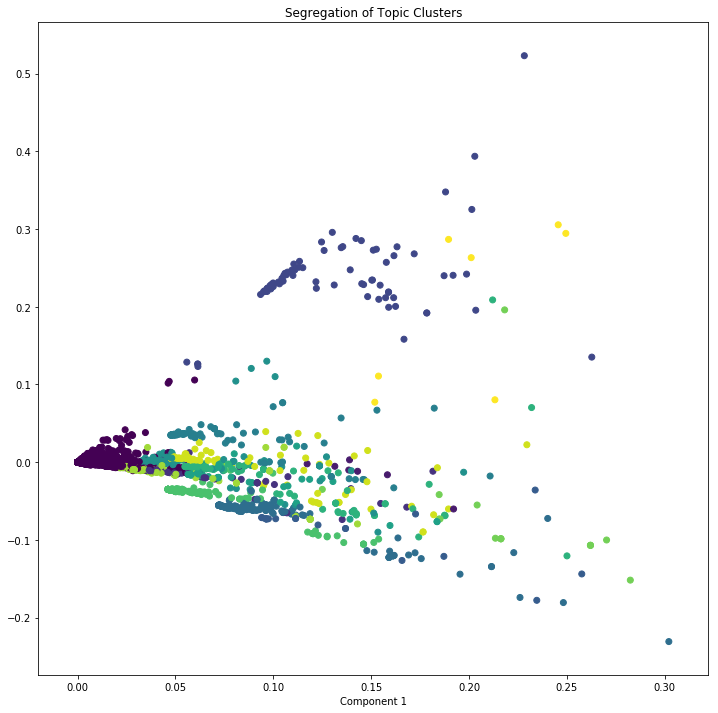

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(nmf_output)

# Build the Singular Value Decomposition(SVD) model
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2)  # 2 components
nmf_output_svd = svd_model.fit_transform(nmf_output)

# X and Y axes of the plot using SVD decomposition
x = nmf_output_svd[:, 0]
y = nmf_output_svd[:, 1]

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

In [20]:
#Vectorize transform
text = tf_vectorizer.transform(test_text)

#LDA Transform
topic_probability_scores = nmf.transform(text)

for i, doc in enumerate(topic_probability_scores):
    if not np.argmax(doc) == 4:
        print(np.argmax(doc))
        print(test_text[i])
        print(doc)

In [11]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += "  ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)
    print()

no_top_words = 12
display_topics(nmf, tf_feature_names, no_top_words)

Topic #0: god  good  know  trust  gift  pray  plan  place  lord  hand  seek  don
Topic #1: love  live  heart  church  friends  jesus  change  fall  hate  sin  feel  deeply
Topic #2: leaders  goal  lead  best  leadership  leader  don  team  room  inspire  believe  remember
Topic #3: like  say  come  want  yes  feel  really  word  sure  know  act  lord
Topic #4: time  good  want  hard  feel  difficult  30pm  quit  bad  live  hope  forget
Topic #5: new  checkout  bracelet  live  video  album  ps  come  old  check  watch  need
Topic #6: make  look  looking  good  better  feel  happy  try  sure  man  plan  strong
Topic #7: day  great  know  think  small  success  efforts  repeat  sum  robert  collier  today
Topic #8: life  live  jesus  don  way  faith  come  let  stay  bring  laugh  truth
Topic #9: people  know  read  need  think  church  stop  help  lord  tweet  shirt  hate

